## Pair Programming - Regresión lineal I

### Intro Machine Learning

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.

## Objetivos

Los objetivos de hoy son:

1. Buscar un conjunto de datos a analizar:

    - Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

In [3]:
df = pd.read_csv('../archivos/Metro_Interstate_Traffic_Volume.csv.gz')

In [4]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


> La variable respuesta será 'traffic_volume' y las variables predictoras serán las demás, eligiendo 'temp' para la primera relación

---

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:

    - Esto se hace para que comprendais mejor los datos con los que estais trabajando.
    - Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
df.shape

(48204, 9)

In [7]:
df.duplicated().sum() # Como vemos que hay 17 filas duplicados decidimos eliminarlos

17

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(48187, 9)

In [10]:
df.describe().T #variables numéricas

,count,mean,std,min,25%,50%,75%,max
temp,48187.0,281.204995,13.338738,0.0,272.16,282.45,291.806,310.07
rain_1h,48187.0,0.334382,44.797033,0.0,0.00,0.00,0.000,9831.30
snow_1h,48187.0,0.000222,0.008169,0.0,0.00,0.00,0.000,0.51
clouds_all,48187.0,49.365451,39.015213,0.0,1.00,64.00,90.000,100.00
traffic_volume,48187.0,3259.618134,1986.954465,0.0,1192.50,3379.00,4933.000,7280.00


In [11]:
df.describe(include='object').T #variables categóricas

,count,unique,top,freq
holiday,48187,12,None,48126
weather_main,48187,11,Clouds,15158
weather_description,48187,38,sky is clear,11659
date_time,48187,40575,2013-04-18 22:00:00,6


In [12]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [13]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [14]:
numericas= df.select_dtypes(include= np.number).columns.tolist()
print(numericas)

['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'traffic_volume']


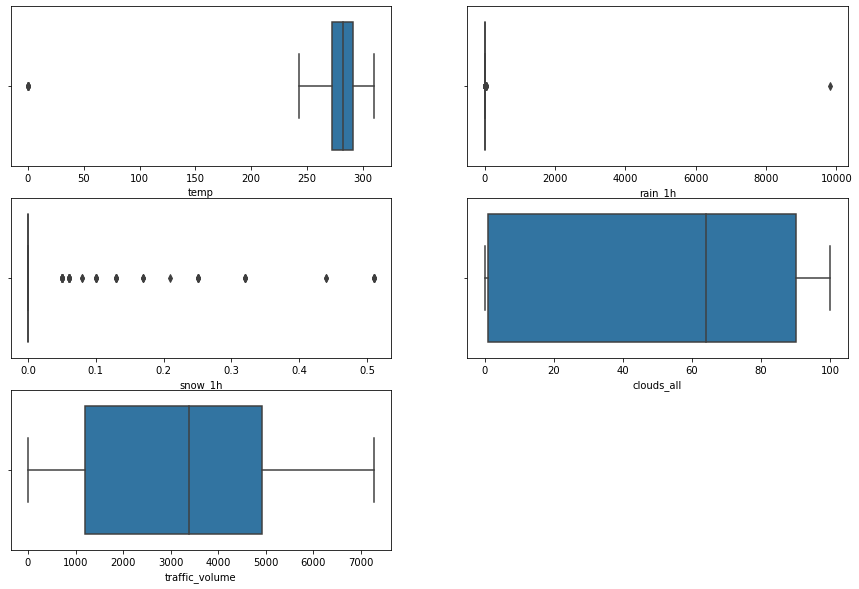

In [15]:
# Gráficas para ver los outliers de cada variable numérica

fig, axes = plt.subplots(3, 2, figsize=(15,10))
axes = axes.flat

for i,col in enumerate(numericas):
  
    sns.boxplot(x= col, data=df, ax=axes[i])
    
fig.delaxes(axes[-1])

In [16]:
# def detectar_outliers(lista_columnas, dataframe): 
#     
#     dicc_indices = {}
#     
#     for col in lista_columnas:
#         
#         Q1 = np.nanpercentile(df[col], 25)
#         Q3 = np.nanpercentile(df[col], 75)
#         
#         IQR = Q3 - Q1
#     
#         outlier_step = 1.5 * IQR
#         
#         outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
#         
#         
#         if outliers_data.shape[0] > 0: 
# 
#             dicc_indices[col] = (list(outliers_data.index)) 
#         
#     
#     return dicc_indices 

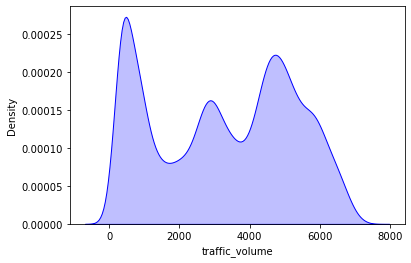

In [17]:
# Gráfica para ver como está distribuida la variable respuesta

sns.distplot(
    df["traffic_volume"], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

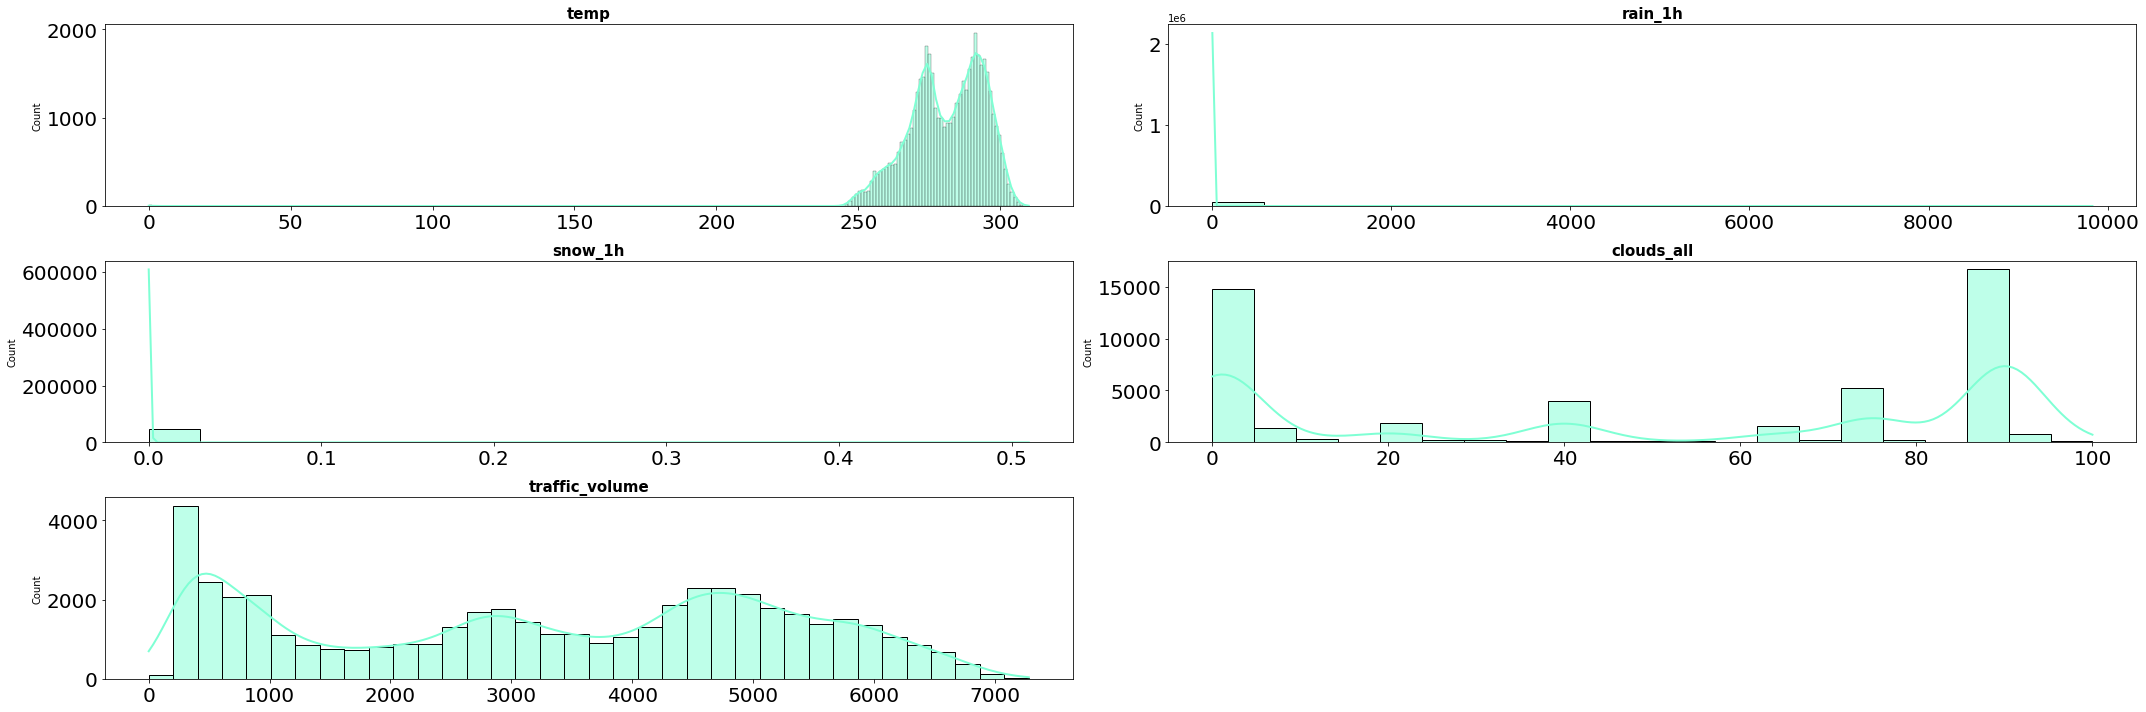

In [18]:
# Gráficas de distribución para cada variable numérica

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))


axes = axes.flat


#numericas = numericas[:-1]

for i, colum in enumerate(numericas): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "aquamarine", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
   
fig.delaxes(axes[-1])
fig.tight_layout();


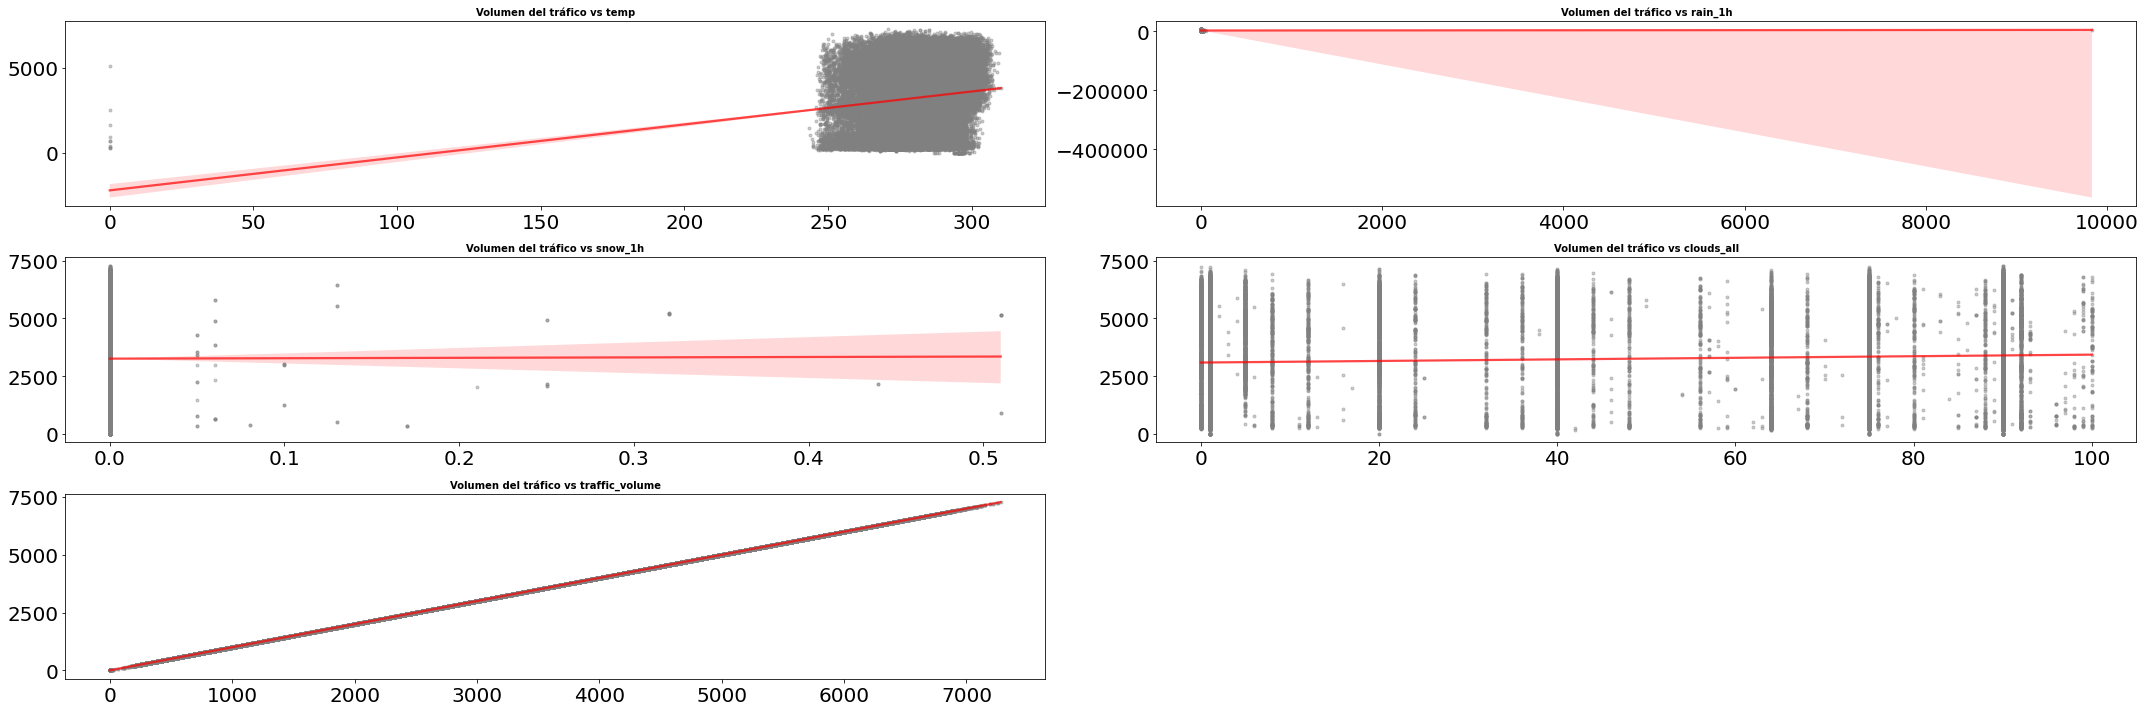

In [21]:
# Gráficas de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (30, 10))


axes = axes.flat


for i, colum in enumerate(numericas):
    sns.regplot(
        x = df[colum], 
        y = df["traffic_volume"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Volumen del tráfico vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

fig.delaxes(axes[-1])    
fig.tight_layout();

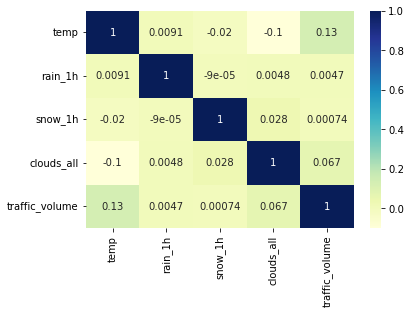

In [22]:
# Gráfica para ver la correlación entre variables

sns.heatmap(df.corr(), 
           cmap = "YlGnBu", 
           annot = True);

In [23]:
df.to_csv("../archivos/metro_1.csv")